In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#对训练集和测试集的特征进行缩放
sc = StandardScaler()
sc.fit(X_train) #学习参数，也就是计算出样本均值和标准差fit
X_train_std = sc.transform(X_train) #使用前面计算得到的均值和标准差进行处理transform
X_test_std = sc.transform(X_test)

In [2]:
lr = LogisticRegression(C=1000.0, random_state=0)

In [8]:
lr.fit(X_train_std, y_train) #学习参数
lr.predict_proba(X_test_std[0,:])

/home/parallels/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

上面预计的输出表示，测试样本集中的第一样本属于第一类的概率是0,第二类的概率为0.0631,第三类的概率是0.9368

In [12]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
print(weights)
print(params)

[array([  6.55979672e-05,   3.27209902e-05]), array([ 0.00065369,  0.00032495]), array([ 0.00631937,  0.00303439]), array([ 0.04881993,  0.01620922]), array([ 0.23882448, -0.06648319]), array([ 1.06011115, -0.84154482]), array([ 2.19190886, -1.98265142]), array([ 2.50582212, -2.30336729]), array([ 2.54373335, -2.3421979 ]), array([ 2.54760621, -2.34616582])]
[1.0000000000000001e-05, 0.0001, 0.001, 0.01, 0.10000000000000001, 1, 10, 100, 1000, 10000]


In [13]:
weights = np.array(weights)
weights

array([[  6.55979672e-05,   3.27209902e-05],
       [  6.53690140e-04,   3.24948619e-04],
       [  6.31936684e-03,   3.03439293e-03],
       [  4.88199280e-02,   1.62092216e-02],
       [  2.38824476e-01,  -6.64831864e-02],
       [  1.06011115e+00,  -8.41544819e-01],
       [  2.19190886e+00,  -1.98265142e+00],
       [  2.50582212e+00,  -2.30336729e+00],
       [  2.54373335e+00,  -2.34219790e+00],
       [  2.54760621e+00,  -2.34616582e+00]])

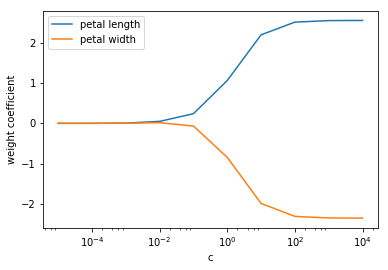

In [20]:
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1], label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('c')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()